In [150]:
def sdss_image_preview(cat):
    from PIL import Image
    import requests
    import pandas as pd
    for _, row in cat.iterrows():
        ra = row['ra']
        dec = row['dec']
        url = f"http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra={ra}&dec={dec}&scale=0.2&width=512&height=512&opt=SLG&query=&Grid=on&Label=on&SpecObjs=on"
        print(f"image-{ra=:.4f}-{dec=:.4f}.gif Preview link:")
        print(url)

        im = Image.open(requests.get(url, stream=True).raw)
        im.save(f"sdss/image-{ra=:.4f}-{dec=:.4f}.gif")
    return im

def sdss_spec_download(cat):
    import requests
    import pandas as pd
    for _, row in cat.iterrows():
        plate = row['plate']
        mjd = row['mjd']
        fiberID = row['fiberID']
        run2d = row['run2d'].decode("utf-8") 
        url = f"https://dr16.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/{plate:04d}/spec-{plate:04d}-{mjd:05d}-{fiberID:04d}.fits"
        print(f"spec-{plate:04d}-{mjd:05d}-{fiberID:04d}.fits Download link:")
        print(url)

        r = requests.get(url, allow_redirects=True)
        open(f"sdss/spec-{plate:04d}-{mjd:05d}-{fiberID:04d}.fits", 'wb').write(r.content)

def sdss_spec_preview(cat):
    from PIL import Image
    import requests
    import pandas as pd
    for _, row in cat.iterrows():
        specobjid = row['specobjid']
        url = f"http://skyserver.sdss.org/dr16/en/get/SpecById.ashx?id={specobjid}"
        print(f"spec-{plate:04d}-{mjd:05d}-{fiberID:04d}.gif Preview link:")
        print(url)

        im = Image.open(requests.get(url, stream=True).raw)
        im.save(f"sdss/spec-{plate:04d}-{mjd:05d}-{fiberID:04d}.gif")
    return im

# Based on the coordinates

In [133]:
import astropy.units as u
from astropy import coordinates as coords
ra = 207.617395
dec = 23.893125
pos = coords.SkyCoord(f"{ra}d {dec}d", frame='fk5')
print(pos)

from astroquery.sdss import SDSS
xid = SDSS.query_region(pos, spectro=True, radius=10*u.arcsec, data_release=16)
xid

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (207.617395, 23.893125)>


ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,bytes7,bytes4
207.617395672501,23.8931251146959,1237667912212873374,5224,301,5,345,2.59248,6001,56072,858,6756761288079331328,v5_13_0,BOSS


image-ra=207.6174-dec=23.8931.gif Preview link:
http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra=207.617395672501&dec=23.8931251146959&scale=0.2&width=512&height=512&opt=SLG&query=&Grid=on&Label=on&SpecObjs=on


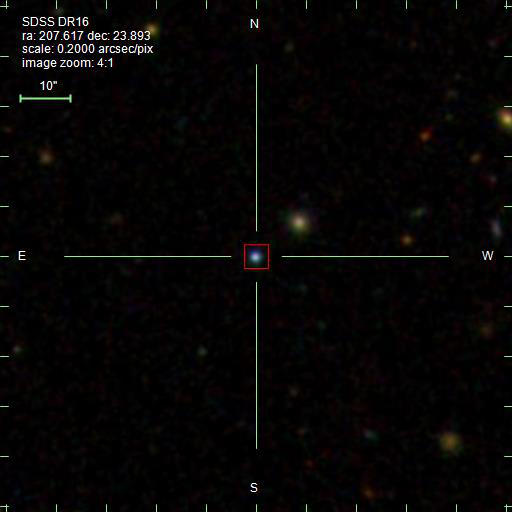

In [151]:
sdss_image_preview(xid.to_pandas())

In [134]:
sdss_spec_download(xid.to_pandas())

spec-6001-56072-0858.fits Download link:
https://dr16.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6001/spec-6001-56072-0858.fits


spec-6001-56072-0858.gif Preview link:
http://skyserver.sdss.org/dr16/en/get/SpecById.ashx?id=6756761288079331328


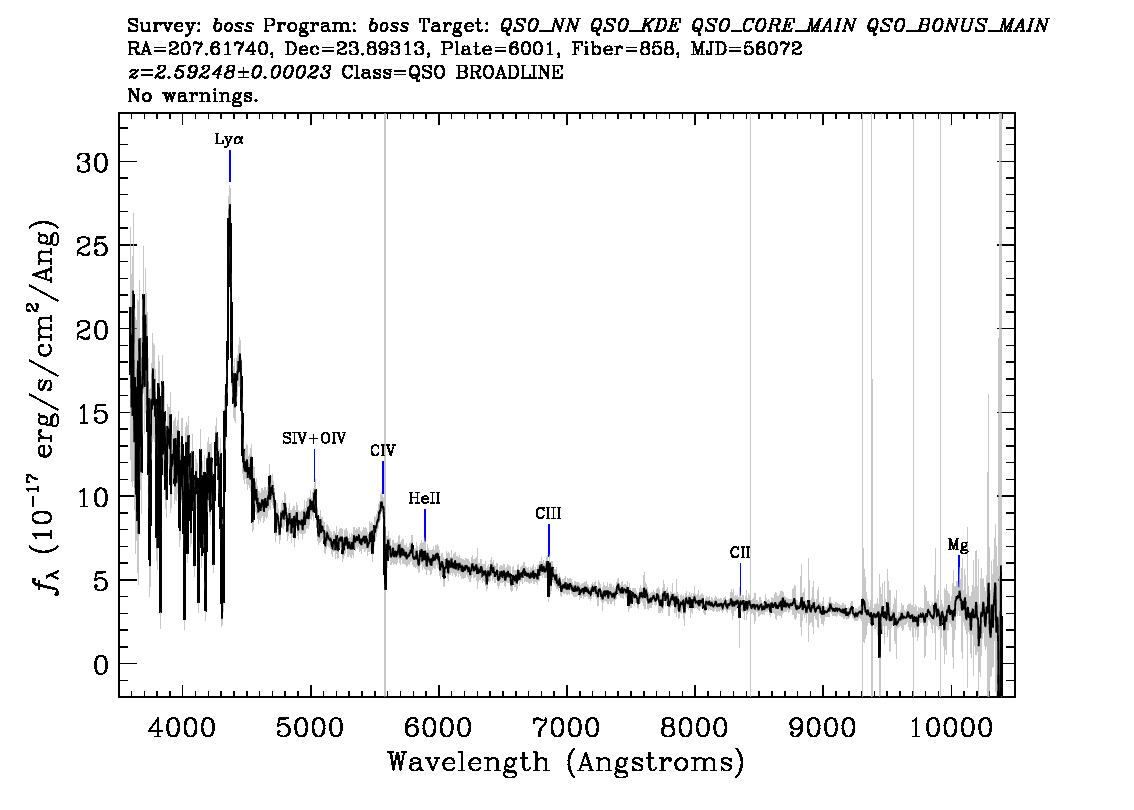

In [135]:
sdss_spec_preview(xid.to_pandas())

# Based on the plate-mjd-fiberID

In [138]:
from astroquery.sdss import SDSS
plate = 6001
mjd = 56072
fiberID = 858
xid = SDSS.query_specobj(plate=plate, mjd=mjd, fiberID=fiberID, data_release=16)
xid

/usr/local/lib/python3.9/site-packages/astroquery/sdss/core.py:862: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,bytes7,bytes4
207.617395672501,23.8931251146959,1237667912212873374,5224,301,5,345,2.59248,6001,56072,858,6756761288079331328,v5_13_0,BOSS


image-ra=207.6174-dec=23.8931.gif Preview link:
http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?TaskName=Skyserver.Chart.Image&ra=207.617395672501&dec=23.8931251146959&scale=0.2&width=512&height=512&opt=SLG&query=&Grid=on&Label=on&SpecObjs=on


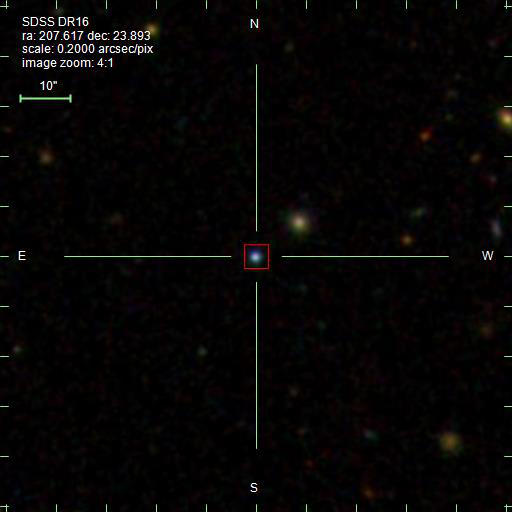

In [149]:
sdss_image_preview(xid.to_pandas())

In [148]:
sdss_spec_download(xid.to_pandas())

spec-6001-56072-0858.fits Download link:
https://dr16.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/6001/spec-6001-56072-0858.fits


spec-6001-56072-0858.gif Preview link:
http://skyserver.sdss.org/dr16/en/get/SpecById.ashx?id=6756761288079331328


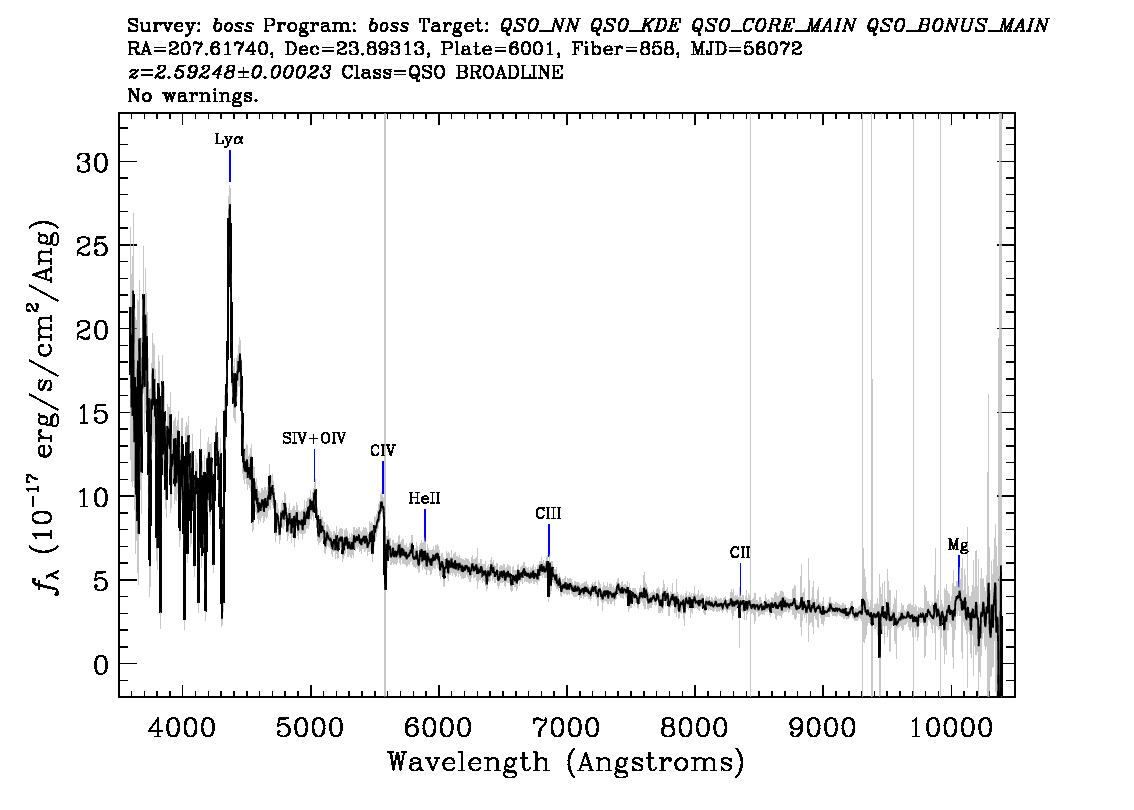

In [140]:
sdss_spec_preview(xid.to_pandas())